In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans


(15, 5)
                                            file_name    tempo  \
0   21 Savage, Offset, Metro Boomin - Ric Flair Dr...   99.384   
1   6LACK - Pretty Little Fears ft. J. Cole (Offic...  129.199   
2   Abacus ft. Cimone - Everybody's Got To Learn S...  103.359   
3           Arizona Zervas - Zone (ft. John Wolf).mp3  135.999   
4   Bachman Turner Overdrive - You Ain't Seen Noth...  117.454   
5       Barely Alive - Warrior (ft. Mad Hed City).mp3   86.133   
6                          bassnectar - bass head.mp3  172.266   
7   bassnectar - cozza frenzy ( mega bass remix ).mp3  135.999   
8   Bassnectar - Magical World feat. Nelly Furtado...  135.999   
9          bassnectar - underwater ft. tina malia.mp3  135.999   
10      benny benassi - cinema ( skrillex remix ).mp3  143.555   
11      Bensley - Do It Again (ft. Armanni Reign).mp3  117.454   
12                     Bert H & Edlan - Intercept.mp3  117.454   
13                       Big L.C.T. - Trendsetter.mp3  143.555   
14

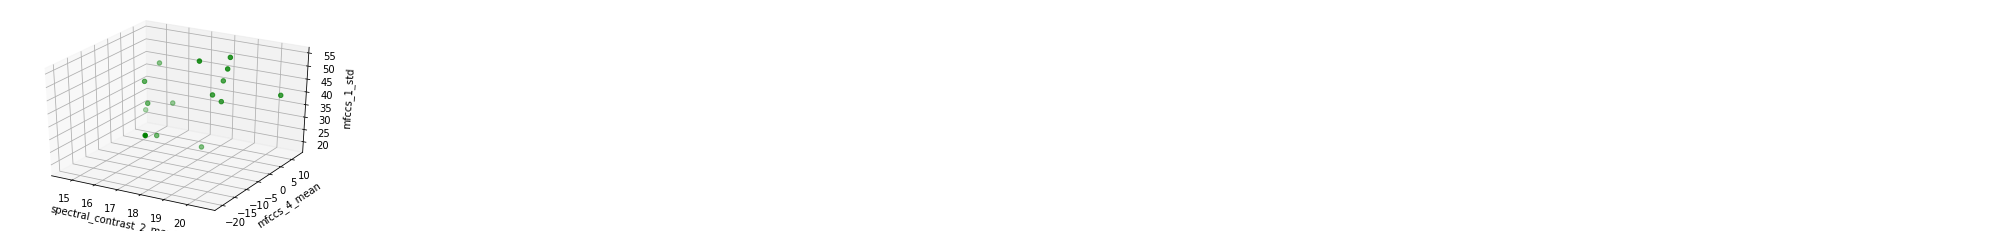

In [44]:
df = pd.read_csv("df_features.csv")

print(df.shape)
print(df)

df_np = np.array(df)

print(df_np[0][1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cax = ax.scatter(df_np[:,2], df_np[:,3], df_np[:,4], c="g")

ax.set_xlabel("spectral_contrast_2_mean")
ax.set_ylabel("mfccs_4_mean")
ax.set_zlabel("mfccs_1_std")
#cbar = fig.colorbar(cax)
#plt.scatter(df_np[:,1], df_np[:,2], s=50)


plt.savefig("3dTest.png", dpi=200)
plt.show()

In [25]:
# Liednamen aus dem Array entfernen
feature_array = np.delete(df_np, 0, 1)
feature_array = np.delete(df_np, 0, 1)

# Die Features umskalieren, um Werte zwischen 0 und 1 zu bekommen [0,1]
X_norm = (feature_array - feature_array.min())/(feature_array.max() - feature_array.min())


(15, 4)
[[0.60610742 0.20192348 0.13264206 0.34588172]
 [0.71582331 0.1944564  0.13581501 0.26950695]
 [1.         0.18432186 0.17260473 0.32918913]
 [0.81275508 0.20223973 0.09442244 0.33796143]
 [0.83155848 0.18684156 0.13050601 0.23042306]]
[0 3 0 3 1 0 2 4 3 3 4 1 1 3 1]
coordinate:  [0.6221381169639154 0.21409166321028616 0.14981854002488593
 0.32214848610535046] label:  0 song:  21 Savage, Offset, Metro Boomin - Ric Flair Drip.mp3
coordinate:  [0.7767160929075072 0.20472832849440067 0.12522293654085442
 0.37215885524678555] label:  3 song:  6LACK - Pretty Little Fears ft. J. Cole (Official Music Video).mp3
coordinate:  [0.6427467855661552 0.2042928245541269 0.13492326835338034
 0.38937163002903363] label:  0 song:  Abacus ft. Cimone - Everybody's Got To Learn Sometime (I Need Your Loving).mp3
coordinate:  [0.8119711737868105 0.20011924512650356 0.10961219411032766
 0.38814288676897557] label:  3 song:  Arizona Zervas - Zone (ft. John Wolf).mp3
coordinate:  [0.715823309829946 0.19

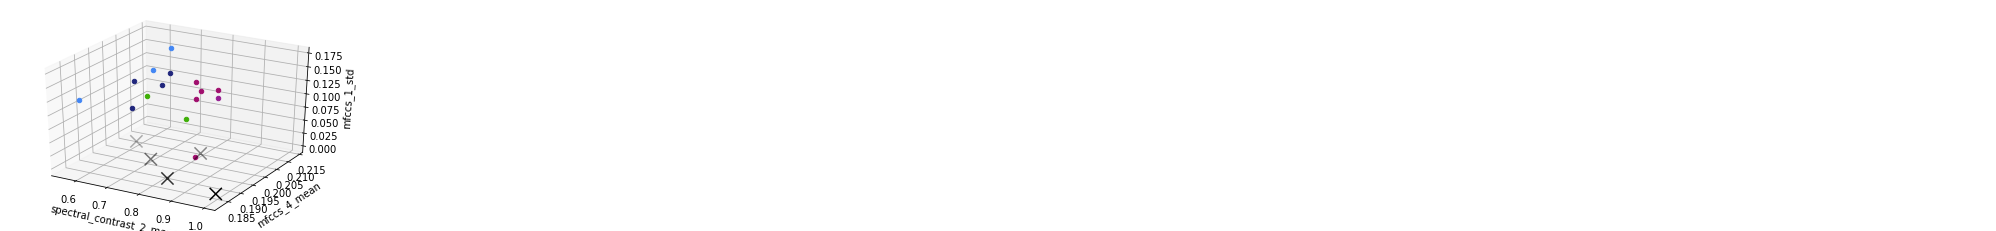

In [45]:
# 
print(X_norm.shape)
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(X_norm)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

colors = ["#4286f4", "#20267c", "#961c92", "#a00e6d", "#3faf07", "#91ce16", "#adaa0d"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("spectral_contrast_2_mean")
ax.set_ylabel("mfccs_4_mean")
ax.set_zlabel("mfccs_1_std")

for i in range(len(X_norm)):
    print("coordinate: ", X_norm[i], "label: ", labels[i], "song: ", df_np[i][0])
    ax.scatter(X_norm[i,0], X_norm[i,1], X_norm[i,2], c=colors[labels[i]])
    #plt.plot(X_norm[i][1],X_norm[i][3], colors[labels[i]], markersize = 10)

ax.scatter(centroids[:,0], centroids[:,1], color = "black", marker = "x", s=150, linewidths = 5, zorder = 10)
plt.savefig("Kmeans.png", dpi=200)
plt.show()

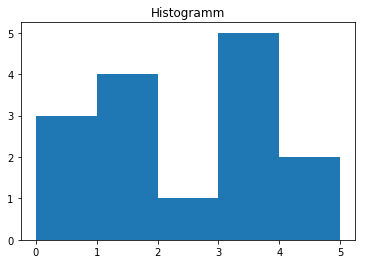

In [51]:
# Wie viele Lieder gehören jeder Gruppe zu
a = np.array(labels) 
plt.hist(a, bins = [0,1,2,3,4,5]) 
plt.title("Histogramm") 
plt.savefig("histogram.png",dpi=200)
plt.show()